In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, MultipleLocator
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
sns.set_context("talk")

In [7]:
results_df = pd.read_pickle("/path/to/benchmark/data/Burgers/sweeping_burgers_500angles_mag0-10_interpRes25_alpha1.0_depNone_reggrid.pkl")
print("Length of results_df = {}".format(len(results_df)))

results_df.rename(columns={"magnitude": "Magnitude", "c": "Diffusion Coefficient"}, inplace=True)

Length of results_df = 88500


In [8]:
def dist(a1, a2):
    return min((a1 - a2) % 360, -(a1 - a2) % 360)

# test:
dist(359, 2), dist(2, 359), dist(250, 15), dist(15, 250), 

(3, 3, 125, 125)

In [9]:
results_df["Angle Estimation Error"] = results_df.apply(lambda row: dist(row["Burgers Angle"], row["Stencil Angle"]), axis=1)

In [12]:
results_df["Angle Estimation Error"].median(), results_df["Angle Estimation Error"].mean()

(10.131721772056963, 25.34715735428626)

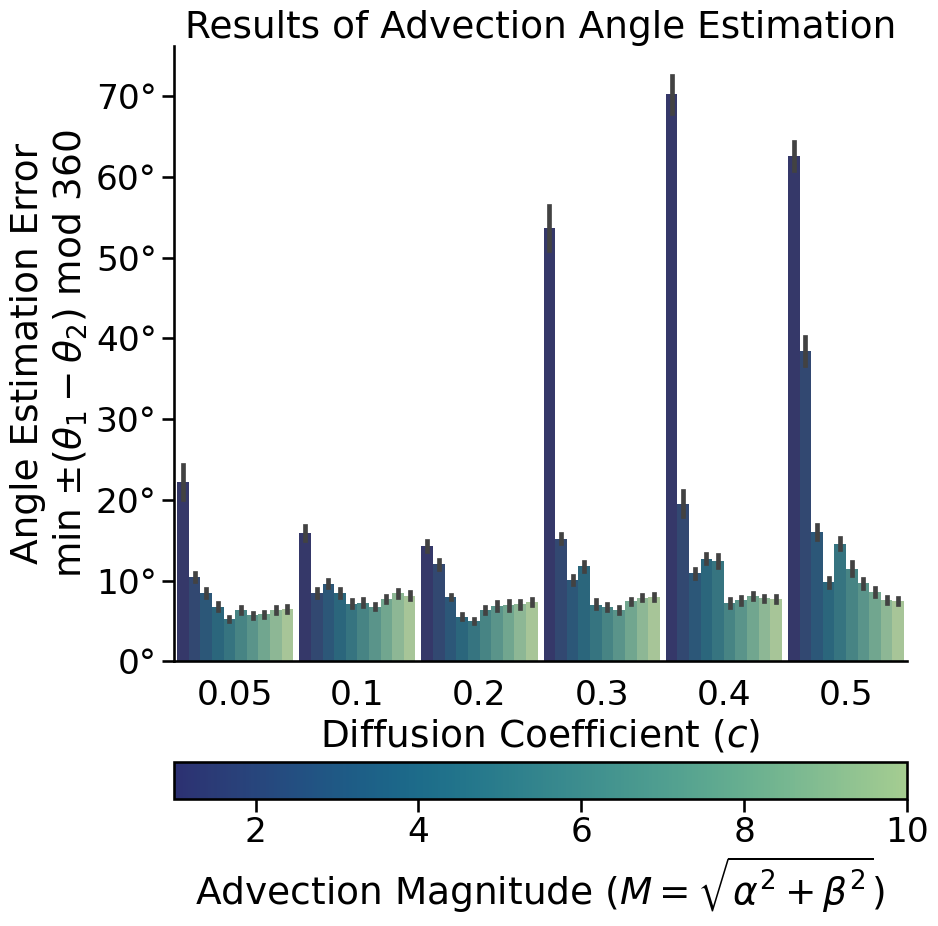

In [14]:
sns.set_context("talk", font_scale=1.5)
data = results_df[np.isin(results_df["Magnitude"], mags) & np.isin(results_df["Diffusion Coefficient"], Cs)]
fig = plt.figure(figsize=(10,10))
g = sns.barplot(data=data, x="Diffusion Coefficient", y="Angle Estimation Error", hue="Magnitude", palette="crest_r", legend="full", width=0.95)
sns.despine(ax=g, top=True, right=True)
g.tick_params(left=True, bottom=False)

magnitudes = data['Magnitude']
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
sm = plt.cm.ScalarMappable(cmap="crest_r", norm=norm)
n = data.size

g.xaxis.set_major_locator(MultipleLocator(1)) # x ticks at multiples of 1
g.yaxis.set_major_formatter(StrMethodFormatter(u"{x:.0f}°"))
g.set_xlabel(r"Diffusion Coefficient ($c$)")
g.set_ylabel("Angle Estimation Error\n" r"min $\pm(\theta_1-\theta_2)$ mod $360$")
g.get_legend().remove()
g.figure.colorbar(sm, ax=g, orientation="horizontal", label=r"Advection Magnitude ($M = \sqrt{\alpha^2+\beta^2}$)", pad=0.12, shrink=1)
g.set_title("Results of Advection Angle Estimation")
plt.tight_layout()